<a href="https://colab.research.google.com/github/rakshitha200013/DL-activity/blob/main/obc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [26]:
image = cv2.imread("b2.jpg")

In [27]:
image_blur = cv2.medianBlur(image,25)

In [28]:
image_blur_gray = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)

In [29]:
image_res ,image_thresh = cv2.threshold(image_blur_gray,240,255,cv2.THRESH_BINARY_INV)


In [30]:
kernel = np.ones((3,3),np.uint8)

In [31]:
opening = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel) 

In [32]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.2*dist_transform.max(),255,0)
last_image = np.uint8(last_image)

In [33]:
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

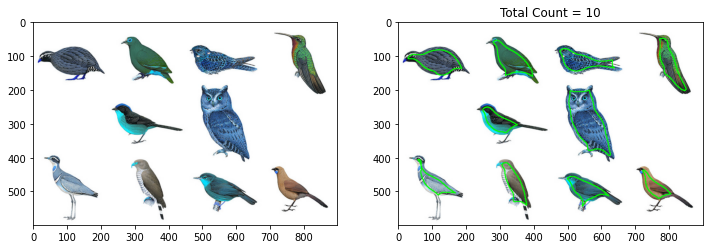

In [34]:
def display(img,count,cmap="gray"):
    f_image = cv2.imread("b2.jpg")
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total Count = {}".format(count))

for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

display(image,len(cnts))